# Autoencoder

An autoencoder is a neural network that learns to copy its input to its output

## Necessary Imports

In [0]:
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load the Dataset

In [0]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/train.csv')

In [0]:
data = df.values

## Pre-processing

Standardize

In [0]:
X = data[:, 1:] / 255.0
y = data[:, 0]

Shuffle

In [0]:
X_train, y_train = shuffle(X, y)

Required Dimensions

In [0]:
D = X_train.shape[1]
M = 300

## Building the Autoencoder

In [0]:
class autoencoder:
  def __init__(self, D, M):
    # list to store training loss at each step
    self.losses = []

    # batch of training data
    self.X = tf.placeholder(tf.float32, shape=(None, D))

    # first layer
    # input => hidden
    self.W = tf.Variable(tf.random_normal(shape=(D, M)) * tf.sqrt(2.0 / M))
    self.b = tf.Variable(tf.zeros(M))

    # second layer
    # hidden => output
    self.V = tf.Variable(tf.random_normal(shape=(M, D)) * tf.sqrt(2.0 / D))
    self.c = tf.Variable(tf.zeros(D))

    # generate by reconstruction
    self.Z = tf.nn.relu(tf.matmul(self.X, self.W) + self.b)
    self.logits = tf.matmul(self.Z, self.V) + self.c
    self.prediction = tf.nn.sigmoid(self.logits)

    # calculate the loss
    self.loss_operation = tf.reduce_sum(tf.nn.sigmoid_cross_entropy_with_logits(labels=self.X, logits=self.logits))

    # train the autoencoder by reducing the calculated loss
    self.train_operation = tf.train.RMSPropOptimizer(learning_rate=0.001).minimize(self.loss_operation)

    # session and variables initialization
    self.init_operation = tf.global_variables_initializer()
    self.sess = tf.InteractiveSession()
    self.sess.run(self.init_operation)

    # model saver object
    self.saver = tf.train.Saver()

  def fit(self, X, epochs=30, batch_size=64):
    # number of batches (or) step size
    num_batches = len(X) // batch_size
    print('Training...')

    for e in range(epochs):
      print("Epoch {}".format(e+1))
      # shuffle training data at each epoch
      np.random.shuffle(X)

      # create new batch at each step and train 
      for offset in range(num_batches):
        new_batch = X[offset*batch_size:(offset+1)*batch_size]
        a, l = self.sess.run((self.train_operation, self.loss_operation), feed_dict={self.X: new_batch})
        l /= batch_size
        self.losses.append(l)
      print("Loss: %.2f" % self.losses[e])

  def predict(self, X):
    # return predicted/generated image
    return self.sess.run(self.prediction, feed_dict={self.X: X})

  def save_weights(self, path):
    # save the model's parameters/weights
    self.saver.save(self.sess, path)
    print("Saved successfully")

## Train the Autoencoder

Instantiate the Autoencoder model

In [0]:
model = autoencoder(D, M)

Train the model

In [10]:
model.fit(X_train)

Training...
Epoch 1
Loss: 572.22
Epoch 2
Loss: 497.25
Epoch 3
Loss: 438.92
Epoch 4
Loss: 379.52
Epoch 5
Loss: 325.45
Epoch 6
Loss: 283.22
Epoch 7
Loss: 258.85
Epoch 8
Loss: 251.90
Epoch 9
Loss: 236.15
Epoch 10
Loss: 218.12
Epoch 11
Loss: 212.74
Epoch 12
Loss: 219.32
Epoch 13
Loss: 218.26
Epoch 14
Loss: 207.97
Epoch 15
Loss: 194.59
Epoch 16
Loss: 205.42
Epoch 17
Loss: 201.06
Epoch 18
Loss: 183.35
Epoch 19
Loss: 187.90
Epoch 20
Loss: 194.89
Epoch 21
Loss: 181.68
Epoch 22
Loss: 177.67
Epoch 23
Loss: 197.93
Epoch 24
Loss: 188.95
Epoch 25
Loss: 176.62
Epoch 26
Loss: 171.08
Epoch 27
Loss: 163.66
Epoch 28
Loss: 173.06
Epoch 29
Loss: 168.84
Epoch 30
Loss: 168.66


## Evaluation

Plot the Autoencoder's loss

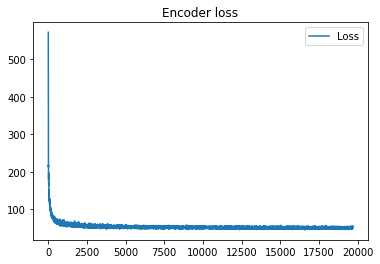

In [11]:
plt.plot(model.losses, label='Loss')
plt.title('Encoder loss')
plt.legend()

Visualize original and autoencoder generated image

Text(0.5, 1.0, 'Generated')

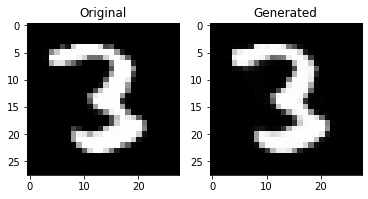

In [12]:
# choose random input from training data
i = np.random.choice(len(X_train))
x = X_train[i]

# generate the output image
img = model.predict([x]).reshape(28, 28)

# plot the original image
plt.subplot(1,2,1)
plt.imshow(x.reshape(28, 28), cmap='gray')
plt.title("Original")

# plot the generated image
plt.subplot(1,2,2)
plt.imshow(img, cmap='gray')
plt.title("Generated")

## Save the model

In [13]:
model.save_weights('/content/drive/My Drive/Colab Notebooks/models/autoencoder/')

Saved successfully
